In [1]:
import tensorflow as tf
from tensorflow import keras

print('tensorflow', tf.__version__)
print('tf.keras', keras.__version__)

tensorflow 2.5.0
tf.keras 2.5.0


In [2]:
import numpy as np

tensor_0d = np.array(12)
tensor_0d

array(12)

In [3]:
tensor_0d.ndim

0

In [4]:
tensor_1d = np.array([12, 3, 6, 14, 7])
tensor_1d

array([12,  3,  6, 14,  7])

In [5]:
tensor_1d.ndim

1

In [6]:
tensor_2d = np.array([[5, 78, 2, 34, 0], 
             [6, 79, 3, 35, 1], 
             [7, 80, 4, 36, 2]])
tensor_2d

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [7]:
tensor_2d.ndim

2

In [8]:
tensor_3d = np.array([[[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
tensor_3d

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [9]:
tensor_3d.ndim

3

In [10]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images.ndim

3

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_images.dtype

dtype('uint8')

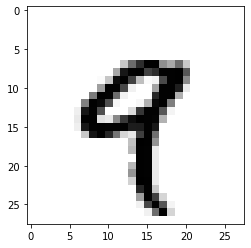

In [14]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [16]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [17]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [18]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [19]:
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


In [20]:
def naive_relu(x):
    assert len(x.shape)
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [21]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [22]:
t1 = np.array([[1, -3, 5], 
               [-2, 4, -8]])
t2 = np.array([[10, 20, 30], 
               [40, 50, 60]])

print(naive_relu(t1))
print(naive_add(t1, t2))

[[1 0 5]
 [0 4 0]]
[[11 17 35]
 [38 54 52]]


In [23]:
t1 + t2

array([[11, 17, 35],
       [38, 54, 52]])

In [24]:
np.maximum(t1, 0.)

array([[1., 0., 5.],
       [0., 4., 0.]])

In [25]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [26]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
print(np.maximum(x, y))

[[[[0.83621295 0.71716367 0.11091374 ... 0.31661753 0.77021735
    0.2939914 ]
   [0.74517521 0.6367383  0.96534401 ... 0.5241485  0.93586328
    0.79657911]
   [0.39272963 0.40567548 0.91677527 ... 0.53209023 0.58023504
    0.83555599]
   ...
   [0.94532734 0.3484236  0.37538839 ... 0.38593423 0.65133842
    0.98775007]
   [0.62362037 0.7020269  0.64697984 ... 0.6251077  0.699724
    0.75723803]
   [0.54195766 0.93030294 0.54946572 ... 0.45480854 0.61190981
    0.53587414]]

  [[0.54459909 0.73614186 0.8863988  ... 0.12892843 0.34486572
    0.2939914 ]
   [0.74517521 0.39432469 0.96534401 ... 0.17773182 0.93586328
    0.53081275]
   [0.47339619 0.89371474 0.91677527 ... 0.29405965 0.36534171
    0.58995581]
   ...
   [0.7119348  0.3484236  0.64273791 ... 0.69772424 0.61849045
    0.91498569]
   [0.29605518 0.64084077 0.62259405 ... 0.98423997 0.37411042
    0.75723803]
   [0.49503478 0.89385481 0.40872659 ... 0.27460499 0.74175351
    0.3698198 ]]

  [[0.50727657 0.98931416 0.41942889

In [27]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [28]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(naive_vector_dot(x, y))

32.0


In [29]:
np.dot(x, y)

32

In [30]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [31]:
x = np.array([[4, 5, 6], 
              [7, 8, 9]])
y = np.array([1, 2, 3])

print(naive_matrix_vector_dot(x, y))

[32. 50.]


In [32]:
np.dot(x, y)

array([32, 50])

In [33]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [34]:
print(naive_matrix_vector_dot(x, y))

[32. 50.]


In [35]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [36]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]])
y = np.array([[1, 3], 
              [2, 4], 
              [3, 5]])
print(naive_matrix_dot(x, y))

[[14. 26.]
 [32. 62.]]


In [37]:
np.dot(x, y)

array([[14, 26],
       [32, 62]])

In [38]:
x = np.array([[0., 1.], 
              [2., 3.], 
              [4., 5.]])
print(x.shape)

(3, 2)


In [39]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [40]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [41]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)
